# Taxi trips as a connection to the airports

In [1]:
import setup

In [2]:
def filter_trips(month, pickup_locs, dropoff_locs):
    return month.loc[
        (month['PULocationID'].isin(pickup_locs)) &
        (month['DOLocationID'].isin(dropoff_locs)) &
        (month['passenger_count'] > 0)
    ]


def devide_by_airport(month):   
    return [month.get(132, 0), month.get(138, 0)]


def sum_airports(sum_trips, month):
    return [sum_trips[i] + month[i] for i in range(2)]


def percentage_airports(amounts):
    return [amount / sum(amounts) * 100 for amount in amounts]


def percentage_manhattan(month):
    return month / month.sum() * 100


def center(center):
    airports_center = []
    
    for category in range(9):
        tmp = center[(center >= category) & (center < category + 1)]
        airports_center.append(list(tmp.keys()))

    return airports_center

# From airports
#### Amount of trips from airports to Manhattan

In [3]:
airport_trips = [filter_trips(month, setup.airports, setup.districts['manhattan'])['DOLocationID'].value_counts() for month in setup.year]
manhattan_center = center(percentage_manhattan(sum(airport_trips)))

for index in range(9):
    print('---------- Category', index, '----------')
    print(manhattan_center[index], '\n')

---------- Category 0 ----------
[4, 12, 24, 41, 42, 43, 45, 50, 74, 75, 88, 114, 116, 120, 125, 127, 128, 137, 144, 151, 152, 153, 158, 166, 194, 202, 209, 211, 224, 232, 243, 244, 246] 

---------- Category 1 ----------
[13, 79, 87, 90, 113, 140, 143, 148, 231, 234, 237, 238, 249, 261, 262, 263] 

---------- Category 2 ----------
[68, 100, 107, 141, 142, 186, 229, 233, 236, 239] 

---------- Category 3 ----------
[163] 

---------- Category 4 ----------
[48, 164, 170] 

---------- Category 5 ----------
[161, 162] 

---------- Category 6 ----------
[] 

---------- Category 7 ----------
[] 

---------- Category 8 ----------
[230] 



![](../assets/airport_manhatten.jpg?raw=true)

# To airports
#### Amount of trips from Manhattan to airports

-------------------- YEAR AVERAGE --------------------
[39.69209023471572, 60.307909765284286] 


-------------------- January --------------------
[39.7576618113942, 60.24233818860579] 

-------------------- February --------------------
[37.84953002713651, 62.15046997286349] 

-------------------- March --------------------
[39.86424900610879, 60.1357509938912] 

-------------------- April --------------------
[39.33628035107951, 60.6637196489205] 

-------------------- May --------------------
[40.47105732897512, 59.52894267102488] 

-------------------- June --------------------
[39.18042287487615, 60.81957712512385] 

-------------------- July --------------------
[40.3283511196574, 59.6716488803426] 

-------------------- August --------------------
[40.6037956291847, 59.3962043708153] 

-------------------- September --------------------
[41.61723567233475, 58.38276432766525] 

-------------------- October --------------------
[39.05970568698584, 60.94029431301416] 

-----------

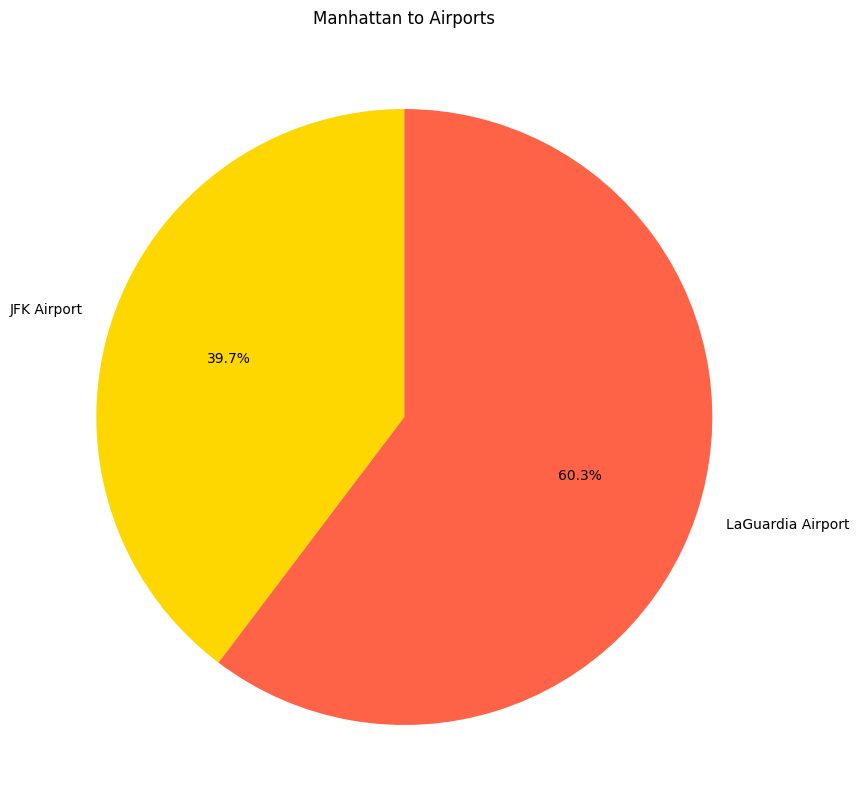

In [4]:
airport_trips = [filter_trips(month, setup.districts['manhattan'], setup.airports)['DOLocationID'].value_counts() for month in setup.year]
devided_airport_trips = [devide_by_airport(month) for month in airport_trips]
airport_trips_amount = [0, 0]

for month in devided_airport_trips:
    airport_trips_amount = sum_airports(airport_trips_amount, month)

print('-------------------- YEAR AVERAGE --------------------')
print(percentage_airports(airport_trips_amount), '\n\n')

for index, month_label in enumerate(setup.month_labels):
    print('--------------------', month_label, '--------------------')
    print(percentage_airports(devided_airport_trips[index]), '\n')

fig, ax = setup.plt.subplots(figsize=(10, 10))
ax.set_title('Manhattan to Airports')
ax.pie(percentage_airports(airport_trips_amount), colors=setup.airport_colors, labels=setup.airport_labels, autopct='%1.1f%%', startangle=90)
setup.plt.show()